※ 図に関しては，特段注釈が入れられていない場合，書籍「最短コースでわかる PyTorch ＆深層学習プログラミング」から参照しています．

---

# NumPy
NumPyは、プログラミング言語Pythonにおいて数値計算を効率的に行うための拡張モジュールです．
特に
- 多次元配列(ベクトル，行列など)を効率的に扱える

という理由で多くの場面で使われるパッケージです．

---

## ベクトル
早速，NumPyでベクトルを定義してみましょう．  
NumPyの配列は，
- `numpy.array`

で作成することができます．  

※ 以降，変数の型が`numpy.ndarray`のものを「NumPy変数」と呼ぶこととします．

In [ ]:
import numpy as np # numpyをインポート（一般にnpと略される）．
vector = np.array([1, 2, 3, 4, 5]) # 長さ5のベクトル
print(vector) # ベクトルを表示
print(type(vector)) # 変数の型を表示

[1 2 3 4 5]
<class 'numpy.ndarray'>


<br>

ベクトル同士を足したい場合は，下記コードのように
- NumPy変数として定義したベクトル同士を`+`で

足すだけでOKです．  

---
この時，お互いのベクトルの長さが異なるとエラーが出るので気をつけましょう．  
（気になる人は，長さが違うベクトル同士を足し合わせてみても良いと思います）

---

In [ ]:
import numpy as np 
vector1 = np.array([1, 2, 3, 4, 5]) 
vector2 = np.array([4, 4, 4, 7, 7])

sum_vector = vector1 + vector2 # ベクトル同士の足し算
print(sum_vector) # 足した後のベクトルを表示

[ 5  6  7 11 12]


<br>

ベクトルの任意の要素を取り出したい時は，下記のように
- インデックスを指定

しましょう．

---
pythonでは，インデックスは 

「1番目，2番目，3番目，・・・」ではなく  
「0番目，1番目，2番目，3番目，・・・」と
- 「0」から開始する

ことに注意しましょう

---

In [ ]:
import numpy as np 
vector = np.array([80, 23, 55, 9])
num1 = vector[0] # vectorの0番目の要素を抽出
num2 = vector[1] # vectorの1番目の要素を抽出
print(num1)
print(num2)

80
23


<br>

ベクトルの長さを調べたいときは，
- `len`

を使用しましょう．


In [ ]:
import numpy as np 
vector = np.array([80, 23, 55, 9])
vector_length = len(vector) # ベクトルの長さを取得
print(vector_length)

4


<br>

ベクトルを連結させたいときは
- `append`

を使用しましょう  

---
※ 注意点：下記の場合，`vector1`の値が書き変わるわけではない（連結した結果を`vector2`に代入しているだけ）ので注意
```
vector1 = np.array([80, 23, 55, 9])
vector2 = np.append(vector1, 79)
```

---

In [ ]:
import numpy as np
vector1 = np.array([80, 23, 55, 9])
vector2 = np.append(vector1, 79) # vector1に任意のスカラーを連結
print(vector2)

vector3 = np.array([48, 32, 43, 12])
vector4 = np.append(vector1, vector3) # vector1の後ろにvector3を連結
print(vector4)

print(vector1) # vector1の値は書き変わっていない

[80 23 55  9 79]
[80 23 55  9 48 32 43 12]
[80 23 55  9]


ここまでで，NumPyが割と直感的に使えることがわかったと思います．  
次は，行列について扱います．

---

## 行列
基本的な操作は，ベクトルの時と同じです．  

### 行列の定義
ベクトルと同じように
- `numpy.array`

で定義しましょう．（3次元以上でも同じです）

In [ ]:
import numpy as np

array = np.array([[1, 2, 3], 
                  [4, 5, 6]])
print(array)


[[1 2 3]
 [4 5 6]]


<br>

行列の要素を抽出したい場合は，下記コードのように
- 数学の行列と同じような扱い方

ができます

In [ ]:
import numpy as np

array = np.array([[1, 2, 3], 
                  [4, 5, 6]])

num = array[0][2] # 0行2列目の要素を抽出
print(num) 

3


<br>

機械学習の場合，
- 行列を画像として扱う

ことが多いと思うので，ここからは画像を例にして進めていきます．

### ヒートマップ
小さい行列を画像として見立てて，ヒートマップを確認してみましょう．  

下記コードを実行すると
- 画素値が高い箇所は白に近く，画素値が低い箇所は黒に近くなっている

ことが分かると思います．（画像の各画素の画素値は「0〜255の整数値」なので，下記コードでもそのように設定しています．）

---
**重要**  
---
ここで注意して欲しいのが，画像の画素を指定したいときに，
- `array[x][y]`

の順番で指定したくなりますが，これだと欲しい画素値が取得できません．  

なぜなら，配列は`array[行][列]`の順番になるので，これをx,yに置き換えると
- `array[y][x]`

となるためです．

例えば，下記コードで生成されるヒートマップの右上の画素の画素値を取得したい場合は
- `array[0][2]`

とする必要があります．

<br>

もう一つの注意点として，原点は画像の左上になるため，  
- y軸は，上方向が-, 下方向が+

となり，一般的な数学で使われる座標系に対して，y軸が逆方向を向いていることに注意してください．

---


255


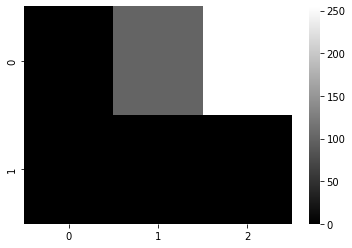

In [ ]:
%matplotlib inline
import numpy as np

# 描画に必要なモジュールをインポート
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

array = np.array([[0, 100, 255], 
                  [0,   0,   0]])
sns.heatmap(array, cmap="gray", vmin=0, vmax=255) # 配列をヒートマップとして表示

print(array[0][2]) # 右上の画素を取得(array[y][x]の順番)

ここから，本格的な画像を扱う場合「OpenCV」と呼ばれるライブラリの知識が必要になってきますが，機械学習に関する説明を優先するため，ここでは割愛します．

<br>

以上で，NumPyの基本的な使い方の説明は終わりです．  
3次元以上に関しても，同じような方法で扱うことができます．